# This notebook plots a map image of WRF-Hydro NetCDF grids

In [1]:
# turn on interactive plotting
%matplotlib notebook  

In [2]:
# turn off warnings for deprecated code in matplotlib 
import warnings
warnings.filterwarnings('ignore')

In [3]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import mplleaflet
import pandas as pd

In [4]:
model_in = 'D:/Jupyter_Notebooks/Testing/data/geo_em.d01.boulder_creek_1km.nc'
model_out = 'D:/Jupyter_Notebooks/Testing/data/2014081216_LDASOUT_DOMAIN1'
geo = Dataset(model_in, mode='r')
nc = Dataset(model_out, mode='r')

In [5]:
geo.variables.keys()

odict_keys(['Times', 'XLAT_M', 'XLONG_M', 'XLAT_V', 'XLONG_V', 'XLAT_U', 'XLONG_U', 'CLAT', 'CLONG', 'MAPFAC_M', 'MAPFAC_V', 'MAPFAC_U', 'MAPFAC_MX', 'MAPFAC_VX', 'MAPFAC_UX', 'MAPFAC_MY', 'MAPFAC_VY', 'MAPFAC_UY', 'E', 'F', 'SINALPHA', 'COSALPHA', 'LANDMASK', 'LANDUSEF', 'LU_INDEX', 'HGT_M', 'SLPX', 'SLPY', 'SOILTEMP', 'SOILCTOP', 'SCT_DOM', 'SOILCBOT', 'SCB_DOM', 'ALBEDO12M', 'GREENFRAC', 'SNOALB', 'SLOPECAT', 'CON', 'VAR', 'OA1', 'OA2', 'OA3', 'OA4', 'OL1', 'OL2', 'OL3', 'OL4', 'VAR_SSO'])

In [6]:
nc.variables.keys()
#nc.variables

odict_keys(['Times', 'IVGTYP', 'ISLTYP', 'SKINTEMP', 'CANWAT', 'SOIL_T', 'SOIL_M', 'SOIL_W', 'SOIL_MX', 'SFCRNOFF', 'UGDRNOFF', 'INTRFLOW', 'SFCEVP', 'ETPND', 'ETAKIN', 'CANEVP', 'EDIRX', 'ETTX', 'ALBEDX', 'WEASD', 'ACRAIN', 'ACSNOM', 'ESNOW', 'DRIP', 'DEWFALL', 'SNODEP', 'VEGFRA', 'Z0', 'HFX', 'QFX', 'GRDFLX', 'SW', 'LW', 'FDOWN', 'XLAI', 'SNOTIME', 'EMBRD', 'SNOALB', 'NOAHRES', 'CH'])

In [7]:
lats = geo.variables['XLAT_M'][0,::-1,:] # these are 3D arrays and needed to be reduced to 2d
lons = geo.variables['XLONG_M'][0,::-1,:]
#luse = np.array(nc.variables['LANDUSEF'][0,::-1,:]) # land use is multidimensional (each cat is a dimension: 24)
#df = pd.DataFrame(lats)
#ax = df.plot()

In [8]:
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='i',epsg=26954,\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0, llcrnrlon=-105.8,llcrnrlat=39.6,urcrnrlon=-104.7,urcrnrlat=40.4)

In [9]:
#lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lons, lats)

In [10]:
var = 'SFCEVP' # Enter the variable id to plot
var_data = np.array(nc.variables[var][0,::-1,:])
var_units = nc.variables[var].units
var_desc = nc.variables[var].description

# mask invalid data
var_plot = np.ma.masked_less(var_data, -9999)

# infor about variable to be plotted
nc.variables[var]

<class 'netCDF4._netCDF4.Variable'>
float32 SFCEVP(Time, south_north, west_east)
    MemoryOrder: XY
    description: Accumulated evaporation from surface
    units: mm
    stagger: -
unlimited dimensions: Time
current shape = (1, 35, 49)
filling off

<IPython.core.display.Javascript object>


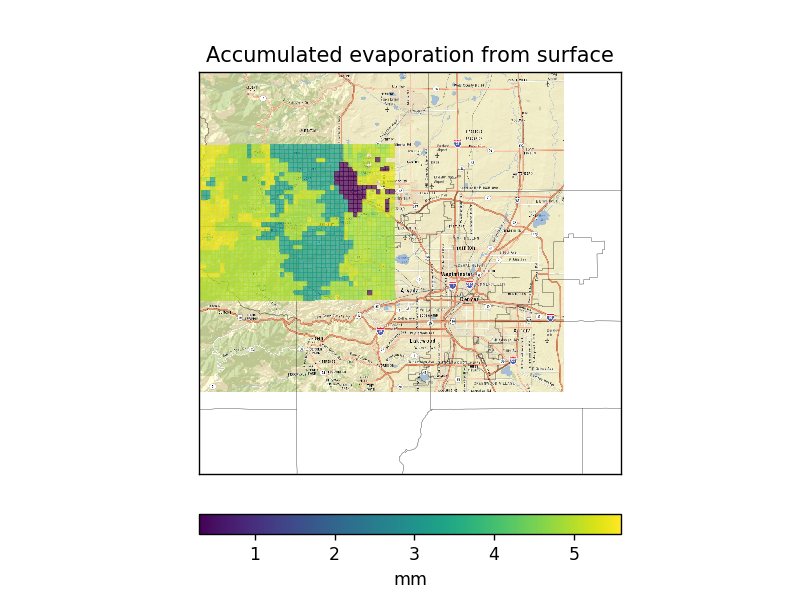

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=888635.5422192932,500960.51006369403,982328.8964908258,590050.7362038977&bboxSR=26954&imageSR=26954&size=1500,1426&dpi=96&format=png32&f=image


In [11]:
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
m.drawcounties() # you can even add counties (and other shapefiles!)
m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1500, verbose= True)

# Plot desired grid
cs = m.pcolormesh(xi,yi,var_plot)

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(var_units)

# Add Title
plt.title(var_desc)
cs.set_alpha(0.7)
#mplleaflet.display(fig=ax.figure, tiles='cartodb_positron')

In [12]:
nc.close()